In [1]:
%cd ..

/Users/mateoibarguen/Desktop/CSC 482/genealogy-extraction


In [60]:
from src.wiki_referencer.wiki_reference import WikiReferencer
from src.relation_models.relation_models import *
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
baseline_model = BaselineRelationModel()

In [4]:
baseline_model.fit_train()

In [5]:
baseline_model.evaluate_test()

Test accuracy:  0.29611547442156655


In [53]:
y_true = baseline_model.test_labels['relation'].map(mapped_values).fillna(1).astype(int)

In [54]:
y_pred = baseline_model.predicted_relations.map(mapped_values).fillna(1).astype(int)

In [52]:
cm = confusion_matrix(y_true, y_pred)

In [86]:
relations = ['P40', 'P3373', 'P26', 'P22', 'P25']
cm_df = pd.DataFrame(cm, columns=relations, index=relations)

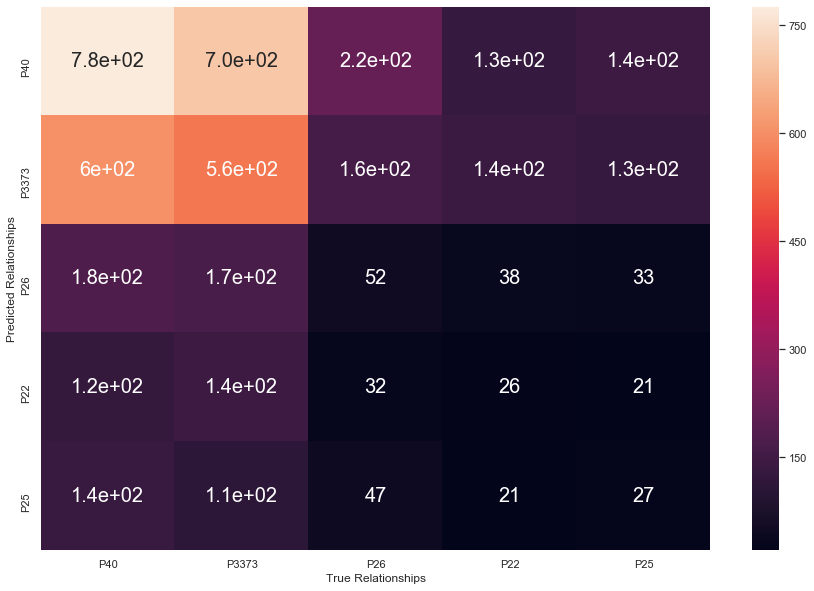

In [99]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.set(font_scale=1)#for label size
sns.heatmap(cm_df, annot=True,annot_kws={"size": 20})
plt.xlabel('True Relationships')
plt.ylabel('Predicted Relationships')
plt.show()

In [100]:
from sklearn.metrics import classification_report

In [102]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           1       0.43      0.39      0.41      1973
           2       0.33      0.35      0.34      1589
           3       0.10      0.11      0.11       465
           4       0.07      0.08      0.07       343
           5       0.08      0.08      0.08       341

    accuracy                           0.31      4711
   macro avg       0.20      0.20      0.20      4711
weighted avg       0.31      0.31      0.31      4711



In [36]:
y_true.isnull().sum()

0

In [37]:
y_pred.isnull().sum()

0

In [17]:
mapped_values = {'P40': 1, 'P3373': 2, 'P26': 3, 'P22': 4, 'P25': 5}